import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and proccessing

In [6]:
#loading the data from csv file
car_dataset = pd.read_csv('./car data.csv')

In [7]:
#inspecting the first 5 rows of data frame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [9]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical Data

In [12]:
#encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#encoding "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
#encoding "Transmission_Type" column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

Splitting data and Target

In [13]:
X=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y=car_dataset['Selling_Price']

Spliting to Train and Test

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [16]:
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model evaluation


In [18]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [19]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8799451660493708


visualize the actual prices and predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

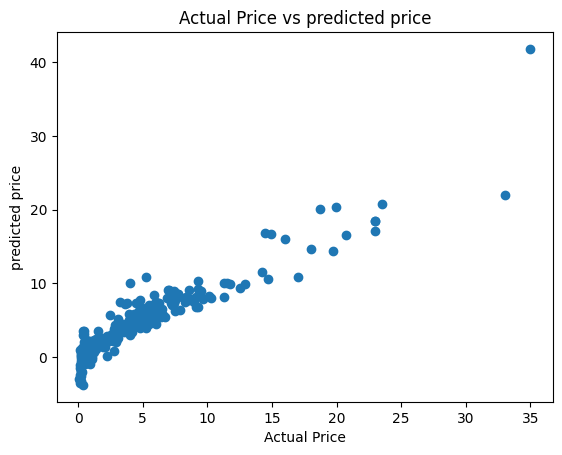

In [20]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual Price vs predicted price")
plt.show

In [21]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [22]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.8365766715026374


<function matplotlib.pyplot.show(close=None, block=None)>

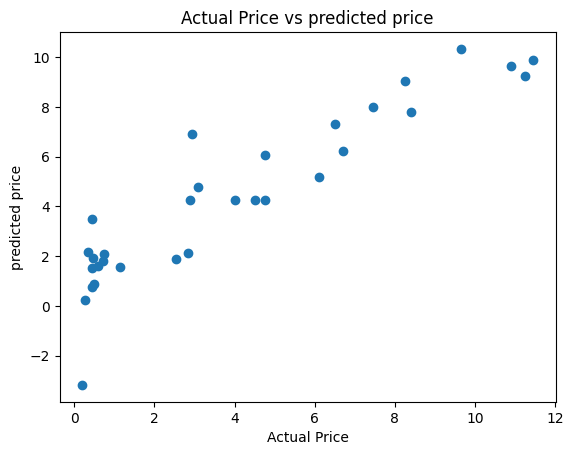

In [23]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual Price vs predicted price")
plt.show

In [24]:
lass_reg_model = Lasso()

In [25]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model evaluation

In [26]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [27]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8427856123435794


<function matplotlib.pyplot.show(close=None, block=None)>

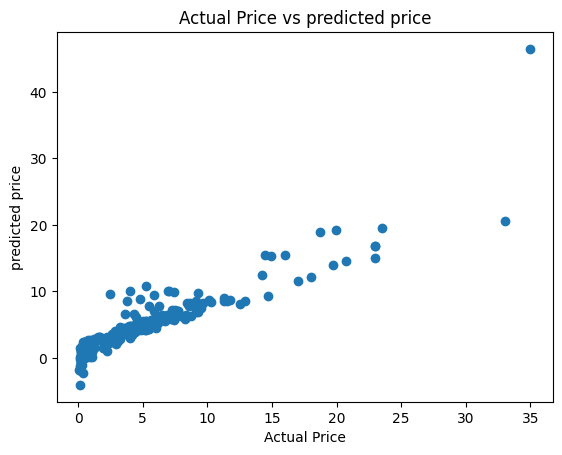

In [28]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual Price vs predicted price")
plt.show

In [29]:
#prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [30]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.8709167941173195


<function matplotlib.pyplot.show(close=None, block=None)>

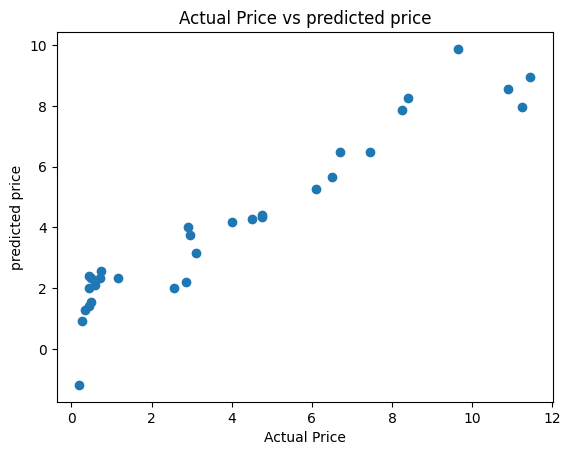

In [31]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual Price vs predicted price")
plt.show